In [1]:
#Import
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Setup splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
# Visit the Mars NASA news site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
# Optional delay for loading the page
browser.is_element_present_by_css('div.list_text', wait_time=1)

False

In [4]:
df = pd.read_html(url)
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [5]:
mars_df = df[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [6]:
#6. Answer the following question: How many months exist on Mars? Answer: 12
max_months_df = mars_df.groupby('month').max()
max_months_df

,id,terrestrial_date,sol,ls,min_temp,pressure
month,,,,,,
1,1668,2017-07-07,1748,29,-62.0,888.0
2,1732,2017-09-12,1814,59,-76.0,908.0
3,1798,2017-11-19,1880,89,-77.0,907.0
4,1863,2018-01-25,1945,119,-77.0,857.0
5,1895,2018-02-27,1977,149,-74.0,777.0
6,1317,2016-07-02,1388,179,-71.0,764.0
7,1360,2016-08-24,1440,209,-65.0,836.0
8,1407,2016-10-11,1487,239,-63.0,914.0
9,1453,2016-11-28,1533,269,-63.0,925.0


In [7]:
#7. Answer the following question: How many Martian (and not Earth) days worth of data exist in the scraped dataset? Answer: 1977
max_days_df = mars_df.groupby('sol').max()
max_days_df

,id,terrestrial_date,ls,month,min_temp,pressure
sol,,,,,,
10,2,2012-08-16,155,6,-75.0,739.0
11,13,2012-08-17,156,6,-76.0,740.0
12,24,2012-08-18,156,6,-76.0,741.0
13,35,2012-08-19,157,6,-74.0,732.0
14,46,2012-08-20,157,6,-74.0,740.0
...,...,...,...,...,...,...
1973,1889,2018-02-23,133,5,-78.0,730.0
1974,1892,2018-02-24,134,5,-77.0,729.0
1975,1894,2018-02-25,134,5,-76.0,729.0


In [9]:
#8. Answer the following question: What are the coldest and the warmest months on Mars (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.
months_df = mars_df.groupby('month')['min_temp'].mean()

months_df

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(0, 0.5, 'Minimum Temp')

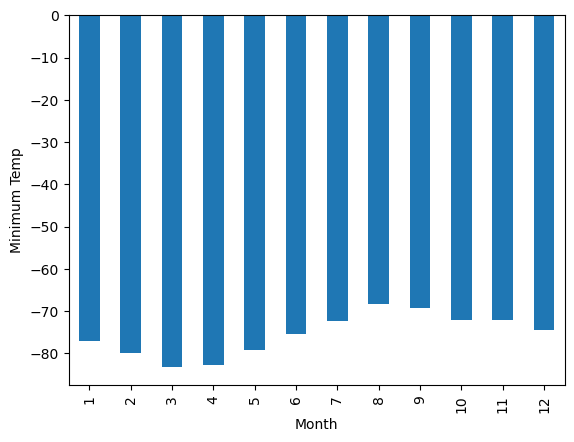

In [10]:
months_df.plot(kind="bar")

plt.xlabel("Month")
plt.ylabel("Minimum Temp")

In [11]:
#9. Answer the following question: Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.

pressure_df = mars_df.groupby('month')['pressure'].mean()

pressure_df

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

Text(0, 0.5, 'Average Pressure')

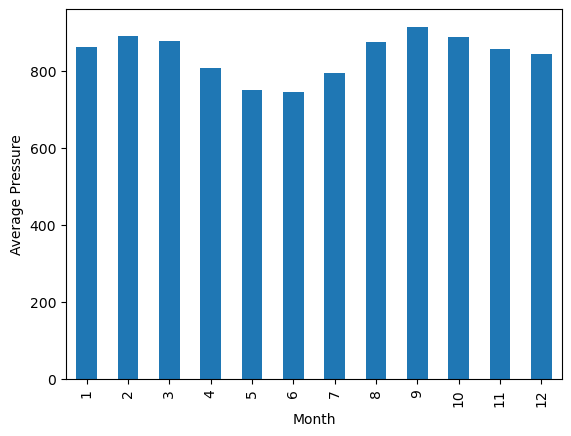

In [12]:
pressure_df.plot(kind="bar")

plt.xlabel("Month")
plt.ylabel("Average Pressure")

In [13]:
#10. Answer the following question: About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature. Answer:  687 days on earth is almost 1 year on mars
days_df = mars_df.groupby('terrestrial_date')['min_temp'].mean()

days_df

terrestrial_date
2012-08-16   -75.0
2012-08-17   -76.0
2012-08-18   -76.0
2012-08-19   -74.0
2012-08-20   -74.0
              ... 
2018-02-23   -78.0
2018-02-24   -77.0
2018-02-25   -76.0
2018-02-26   -77.0
2018-02-27   -77.0
Name: min_temp, Length: 1867, dtype: float64

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000.]),
 [Text(-250.0, 0, '2017-06-15'),
  Text(0.0, 0, '2012-08-16'),
  Text(250.0, 0, '2013-06-07'),
  Text(500.0, 0, '2014-03-25'),
  Text(750.0, 0, '2014-12-06'),
  Text(1000.0, 0, '2015-09-05'),
  Text(1250.0, 0, '2016-05-21'),
  Text(1500.0, 0, '2017-02-11'),
  Text(1750.0, 0, '2017-10-31'),
  Text(2000.0, 0, '')])

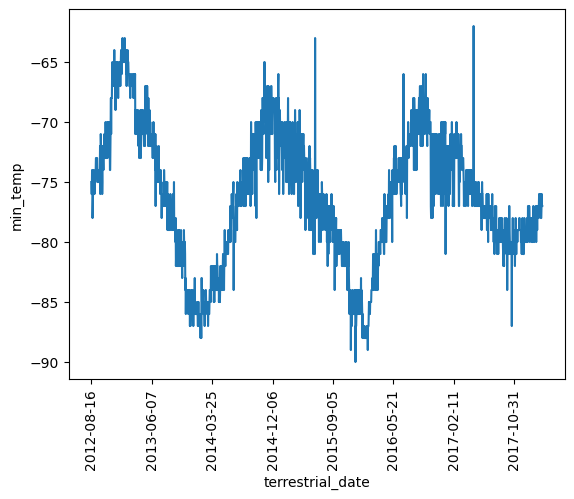

In [14]:
days_df.plot(kind="line")

plt.ylabel("min_temp")
plt.xlabel("terrestrial_date")
plt.xticks(rotation='vertical')

In [15]:
mars_df.to_csv('mars.csv')